# **Kaggle Data**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"5901cffd98e3fce7636781e4b883dad9"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d matleonard/feature-engineering-data

 93% 182M/196M [00:03<00:00, 67.7MB/s]
100% 196M/196M [00:03<00:00, 58.8MB/s]


In [ ]:
!unzip '/content/feature-engineering-data.zip' -d '/content/'

Archive:  /content/feature-engineering-data.zip
  inflating: /content/baseline_data.pqt  
  inflating: /content/catboost_encodings.pqt  
  inflating: /content/count_encodings.pqt  
  inflating: /content/downloads.pqt  
  inflating: /content/interactions.pqt  
  inflating: /content/past_6hr_events.pqt  
  inflating: /content/svd_encodings.pqt  
  inflating: /content/time_deltas.pqt  
  inflating: /content/train_sample.csv  


# **Data Cleaning**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.under_sampling import (NeighbourhoodCleaningRule, NearMiss)
from collections import Counter

In [ ]:
train_sample = pd.read_csv('/content/train_sample.csv')
baseline_data = pd.read_parquet('/content/baseline_data.pqt')
interactions = pd.read_parquet('/content/interactions.pqt')

catboost_encodings = pd.read_parquet('/content/catboost_encodings.pqt')
count_encodings = pd.read_parquet('/content/count_encodings.pqt')
svd_encodings = pd.read_parquet('/content/svd_encodings.pqt')

downloads = pd.read_parquet('/content/downloads.pqt')
past_6hr_events = pd.read_parquet('/content/past_6hr_events.pqt')
time_deltas = pd.read_parquet('/content/time_deltas.pqt')

time_deltas

,past_events
0,1309.0
1,1309.0
2,1309.0
3,1309.0
4,1309.0
...,...
2300556,2820.0
2300557,22.0
2300558,78.0
2300559,1774.0


In [ ]:
extra =  pd.concat([time_deltas , past_6hr_events , downloads] , axis= 1)
extra

,past_events,ip_past_6hr_counts,previous_downloads
0,1309.0,0.0,1.0
1,1309.0,0.0,1.0
2,1309.0,0.0,1.0
3,1309.0,0.0,1.0
4,1309.0,0.0,1.0
...,...,...,...
2300556,2820.0,23.0,29.0
2300557,22.0,70.0,14.0
2300558,78.0,62.0,80.0
2300559,1774.0,9.0,11.0


In [ ]:
#data = pd.concat([time_deltas , train_sample , svd_encodings , past_6hr_events , baseline_data , 
#                  catboost_encodings , count_encodings , downloads , interactions] , axis= 1)
#data

## **baseline_data**

In [ ]:
min(baseline_data['click_time'])

In [ ]:
max(baseline_data['click_time'])

In [ ]:
baseline_data = baseline_data.drop(columns=['minute' , 'second' ,'click_time' , 'attributed_time'])
baseline_data

In [ ]:
data1 =  pd.concat([extra , baseline_data] , axis= 1)
data1

In [ ]:
corr=data1.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)

## **train_sample**

In [ ]:
baseline_data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,27226,3,1,13,120,2017-11-06 15:13:23,None,0,6,15,13,23
1,110007,35,1,13,10,2017-11-06 15:41:07,2017-11-07 08:17:19,1,6,15,41,7
2,1047,6,1,13,157,2017-11-06 15:42:32,None,0,6,15,42,32
3,76270,3,1,13,120,2017-11-06 15:56:17,None,0,6,15,56,17
4,57862,3,1,13,120,2017-11-06 15:57:01,None,0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,9791,2,1,19,166,2017-11-09 15:59:59,None,0,9,15,59,59
2300557,6240,14,1,13,146,2017-11-09 15:59:59,None,0,9,15,59,59
2300558,15098,12,2,17,50,2017-11-09 16:00:00,None,0,9,16,0,0
2300559,10538,12,1,15,41,2017-11-09 16:00:00,None,0,9,16,0,0


In [ ]:
date = baseline_data.drop(columns=['minute' , 'second' ,'click_time' , 'attributed_time','is_attributed','channel' , 'os' , 
                    'device' , 'app' , 'ip'])
date

,day,hour
0,6,15
1,6,15
2,6,15
3,6,15
4,6,15
...,...,...
2300556,9,15
2300557,9,15
2300558,9,16
2300559,9,16


In [ ]:
#train_sample['click_time'] = pd.to_datetime(train_sample['click_time'])
#type(train_sample['click_time'])

In [ ]:
#max(train_sample['click_time'])

In [ ]:
train_sample

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0
...,...,...,...,...,...,...,...,...
2300556,32457,2,1,19,477,2017-11-09 15:59:59,NaN,0
2300557,20266,14,1,13,446,2017-11-09 15:59:59,NaN,0
2300558,49383,12,2,17,178,2017-11-09 16:00:00,NaN,0
2300559,34894,12,1,15,145,2017-11-09 16:00:00,NaN,0


In [ ]:
train_sample = train_sample.drop(columns=['click_time' , 'attributed_time'])
train_sample

,ip,app,device,os,channel,is_attributed
0,89489,3,1,13,379,0
1,204158,35,1,13,21,1
2,3437,6,1,13,459,0
3,167543,3,1,13,379,0
4,147509,3,1,13,379,0
...,...,...,...,...,...,...
2300556,32457,2,1,19,477,0
2300557,20266,14,1,13,446,0
2300558,49383,12,2,17,178,0
2300559,34894,12,1,15,145,0


In [ ]:
data2 =  pd.concat([extra , train_sample , date] , axis= 1)
data2

,past_events,ip_past_6hr_counts,previous_downloads,ip,app,device,os,channel,is_attributed,day,hour
0,1309.0,0.0,1.0,89489,3,1,13,379,0,6,15
1,1309.0,0.0,1.0,204158,35,1,13,21,1,6,15
2,1309.0,0.0,1.0,3437,6,1,13,459,0,6,15
3,1309.0,0.0,1.0,167543,3,1,13,379,0,6,15
4,1309.0,0.0,1.0,147509,3,1,13,379,0,6,15
...,...,...,...,...,...,...,...,...,...,...,...
2300556,2820.0,23.0,29.0,32457,2,1,19,477,0,9,15
2300557,22.0,70.0,14.0,20266,14,1,13,446,0,9,15
2300558,78.0,62.0,80.0,49383,12,2,17,178,0,9,16
2300559,1774.0,9.0,11.0,34894,12,1,15,145,0,9,16


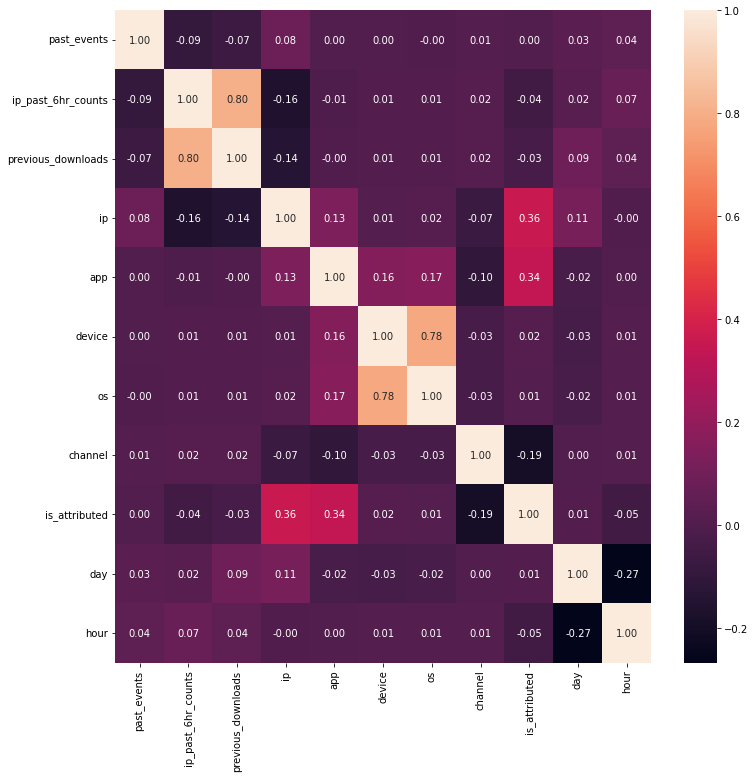

In [ ]:
corr=data2.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,fmt='.2f' ,annot = True)

### **Some Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


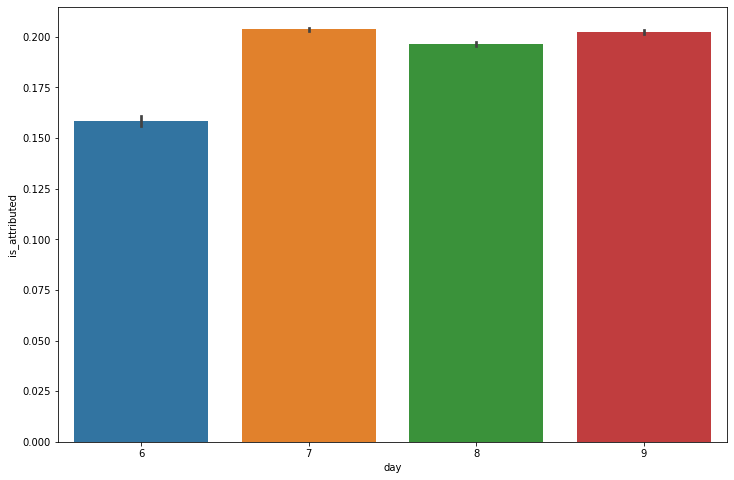

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data2['day'] , data2['is_attributed'] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


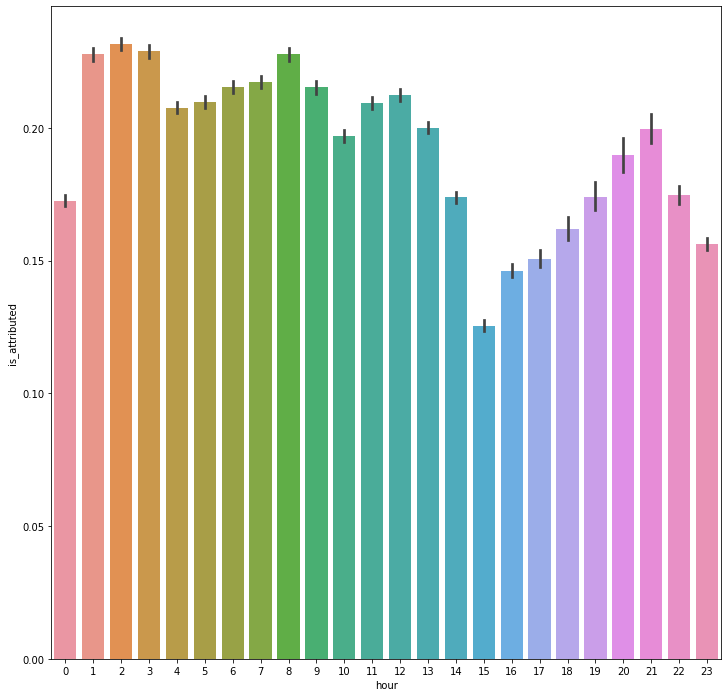

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(data2['hour'] , data2['is_attributed'] )

## **Add Some Features**

In [ ]:
data3 = data2.drop(columns=['previous_downloads' , 'device' ,'os' , 'day' , 'hour','app','channel'])
data3

,past_events,ip_past_6hr_counts,ip,is_attributed
0,1309.0,0.0,89489,0
1,1309.0,0.0,204158,1
2,1309.0,0.0,3437,0
3,1309.0,0.0,167543,0
4,1309.0,0.0,147509,0
...,...,...,...,...
2300556,2820.0,23.0,32457,0
2300557,22.0,70.0,20266,0
2300558,78.0,62.0,49383,0
2300559,1774.0,9.0,34894,0


In [ ]:
data3 =  pd.concat([data3 , catboost_encodings] , axis= 1)
data3

,past_events,ip_past_6hr_counts,ip,is_attributed,app_cb,device_cb,os_cb,channel_cb
0,1309.0,0.0,89489,0,0.028329,0.152087,0.138712,0.034049
1,1309.0,0.0,204158,1,0.995828,0.152087,0.138712,0.950244
2,1309.0,0.0,3437,0,0.009261,0.152087,0.138712,0.019384
3,1309.0,0.0,167543,0,0.028329,0.152087,0.138712,0.034049
4,1309.0,0.0,147509,0,0.028329,0.152087,0.138712,0.034049
...,...,...,...,...,...,...,...,...
2300556,2820.0,23.0,32457,0,0.026755,0.152087,0.157243,0.016611
2300557,22.0,70.0,20266,0,0.026518,0.152087,0.138712,0.031812
2300558,78.0,62.0,49383,0,0.011220,0.026726,0.109914,0.012445
2300559,1774.0,9.0,34894,0,0.011220,0.152087,0.090235,0.129124


# **Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler , MinMaxScaler
sc = StandardScaler()
mm = MinMaxScaler()

## **imbalanced**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


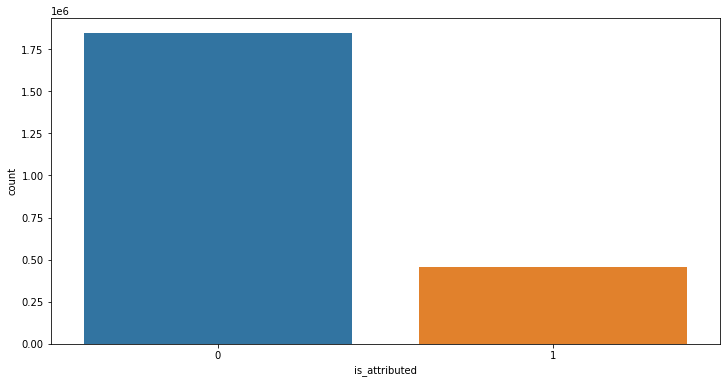

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data2['is_attributed'])

### **NeighbourhoodCleaningRule**

In [ ]:
sampler = NeighbourhoodCleaningRule()
x = data2.drop(columns=['is_attributed'])
y = pd.DataFrame(data2['is_attributed'])
x, y = sampler.fit_resample(x, y)
print('NearestNeighbours Clearning Rule undersampling {}'.format(Counter(y)))

In [ ]:
y.value_counts()

### **Random undersampling**

In [ ]:
temp = data3['is_attributed']==0
tempdata = data3[temp]
tempdata = tempdata.sample(500000)
tempdata

,past_events,ip_past_6hr_counts,ip,is_attributed,app_cb,device_cb,os_cb,channel_cb
2009370,209.0,16.0,38575,0,0.110939,0.152087,0.109914,0.134679
19383,52.0,12.0,25737,0,0.026755,0.152087,0.157243,0.012363
1083687,4279.0,1.0,182987,0,0.048500,0.152087,0.118784,0.047019
766097,1044.0,4.0,213098,0,0.021687,0.152087,0.157243,0.009204
1661413,1527.0,5.0,86436,0,0.011220,0.152087,0.138712,0.011481
...,...,...,...,...,...,...,...,...
1690026,148.0,86.0,44725,0,0.028329,0.152087,0.113451,0.025445
1786365,3947.0,10.0,106738,0,0.014025,0.152087,0.492259,0.022276
1380642,7.0,12.0,143799,0,0.184998,0.152087,0.155021,0.046400
1325656,34.0,116.0,44744,0,0.004225,0.026726,0.157243,0.046400


In [ ]:
temp = data3['is_attributed']==1
tempdata2 = data3[temp]
tempdata2

,past_events,ip_past_6hr_counts,ip,is_attributed,app_cb,device_cb,os_cb,channel_cb
1,1309.0,0.0,204158,1,0.995828,0.152087,0.138712,0.950244
15,1309.0,0.0,29692,1,0.110939,0.152087,0.155021,0.102853
19,1309.0,0.0,64516,1,0.995828,0.152087,0.138712,0.950244
23,1309.0,0.0,172429,1,0.995828,0.152087,0.058385,0.995904
36,1309.0,0.0,199085,1,0.995828,0.152087,0.138712,0.995904
...,...,...,...,...,...,...,...,...
2300297,1309.0,0.0,313982,1,0.839664,0.152087,0.252092,0.949253
2300298,1309.0,0.0,331467,1,0.885835,0.152087,0.283847,0.949253
2300328,10108.0,1.0,29789,1,0.950859,0.152087,0.289780,0.994455
2300334,273.0,1.0,308776,1,0.839664,0.152087,0.301673,0.949253


In [ ]:
data3_new = pd.concat([tempdata , tempdata2],axis= 0)
data3_new

,past_events,ip_past_6hr_counts,ip,is_attributed,app_cb,device_cb,os_cb,channel_cb
2009370,209.0,16.0,38575,0,0.110939,0.152087,0.109914,0.134679
19383,52.0,12.0,25737,0,0.026755,0.152087,0.157243,0.012363
1083687,4279.0,1.0,182987,0,0.048500,0.152087,0.118784,0.047019
766097,1044.0,4.0,213098,0,0.021687,0.152087,0.157243,0.009204
1661413,1527.0,5.0,86436,0,0.011220,0.152087,0.138712,0.011481
...,...,...,...,...,...,...,...,...
2300297,1309.0,0.0,313982,1,0.839664,0.152087,0.252092,0.949253
2300298,1309.0,0.0,331467,1,0.885835,0.152087,0.283847,0.949253
2300328,10108.0,1.0,29789,1,0.950859,0.152087,0.289780,0.994455
2300334,273.0,1.0,308776,1,0.839664,0.152087,0.301673,0.949253


In [ ]:
x = data3_new.drop(columns=['is_attributed'])
y = pd.DataFrame(data3_new['is_attributed'])

## **ready for model**

In [ ]:
#run this if you dont want sampling

x = data3.drop(columns=['is_attributed'])
y = pd.DataFrame(data3['is_attributed'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(765476, 7)
(191370, 7)
(765476, 1)
(191370, 1)


In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## **Logistic Regresion**

In [ ]:
log = LogisticRegression(class_weight='balanced')
log.fit(x_train,y_train)
y_pred = log.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 95.08859780097498 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    368531
           1       0.91      0.84      0.87     91582

    accuracy                           0.95    460113
   macro avg       0.93      0.91      0.92    460113
weighted avg       0.95      0.95      0.95    460113



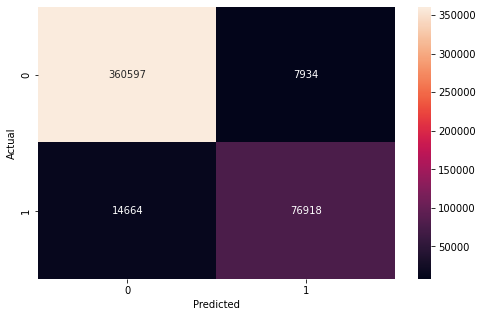

In [ ]:
y_true = ['0','1']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **Decision 2 Features**

Feature: 0, Score: -0.02278
Feature: 1, Score: 0.03145
Feature: 2, Score: 0.48239
Feature: 3, Score: 1.69722
Feature: 4, Score: -0.12070
Feature: 5, Score: 0.07288
Feature: 6, Score: 0.74916


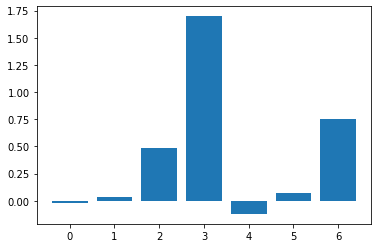

In [ ]:
# get importance
importance = log.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
log.fit(x_train[:,[3,6]],y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [ ]:
data3

,past_events,ip_past_6hr_counts,ip,is_attributed,app_cb,device_cb,os_cb,channel_cb
0,1309.0,0.0,89489,0,0.028329,0.152087,0.138712,0.034049
1,1309.0,0.0,204158,1,0.995828,0.152087,0.138712,0.950244
2,1309.0,0.0,3437,0,0.009261,0.152087,0.138712,0.019384
3,1309.0,0.0,167543,0,0.028329,0.152087,0.138712,0.034049
4,1309.0,0.0,147509,0,0.028329,0.152087,0.138712,0.034049
...,...,...,...,...,...,...,...,...
2300556,2820.0,23.0,32457,0,0.026755,0.152087,0.157243,0.016611
2300557,22.0,70.0,20266,0,0.026518,0.152087,0.138712,0.031812
2300558,78.0,62.0,49383,0,0.011220,0.026726,0.109914,0.012445
2300559,1774.0,9.0,34894,0,0.011220,0.152087,0.090235,0.129124


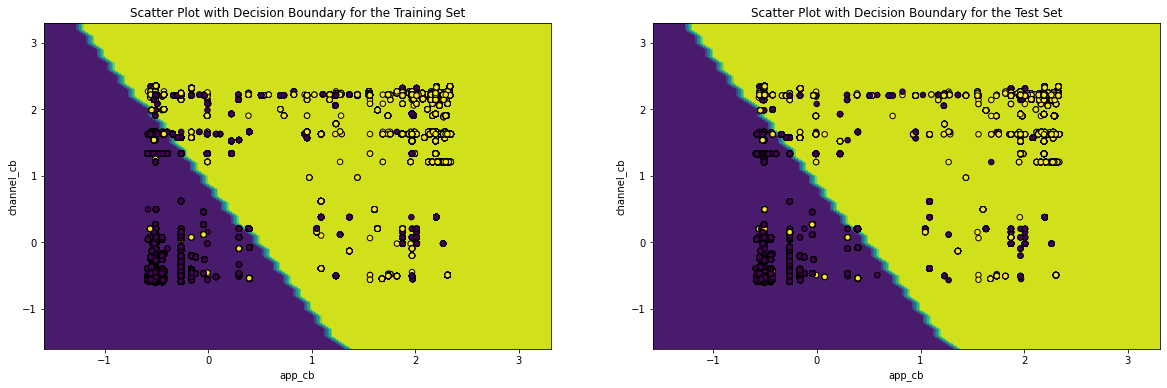

In [ ]:
x_min, x_max = x_train[:, 3].min() - 1, x_train[:, 3].max() + 1
y_min, y_max = x_train[:, 6].min() - 1, x_train[:, 6].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_train = log.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = x_test[:, 3].min() - 1, x_test[:, 3].max() + 1
y_min, y_max = x_test[:, 6].min() - 1, x_test[:, 6].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_test = log.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_train[:, 3], x_train[:, 6], c = y_train['is_attributed'], s = 30, edgecolor = 'k')
plt.xlabel('app_cb')
plt.ylabel('channel_cb')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(x_test[:, 3], x_test[:, 6], c = y_test['is_attributed'], s = 30, edgecolor = 'k')
plt.xlabel('app_cb')
plt.ylabel('channel_cb')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

### **AUC curve**

In [ ]:
predict = log.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, predict[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

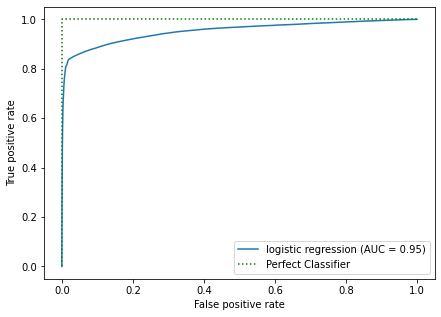

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
 
plt.plot(fpr, tpr, label='logistic regression (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

## **SVM**

In [ ]:
#run this if you want use sampled data
#samp = data2_new.sample(100000)

#run this if you dont want to use sampled data
samp = data3.sample(100000)

samp

,past_events,ip_past_6hr_counts,ip,is_attributed,app_cb,device_cb,os_cb,channel_cb
512196,19742.0,1.0,52108,0,0.026518,0.152087,0.138712,0.034049
108494,542.0,19.0,123872,0,0.028329,0.152087,0.139789,0.057330
560755,3748.0,1.0,98106,0,0.021880,0.152087,0.138712,0.012445
1025265,3687.0,3.0,217511,0,0.011220,0.152087,0.157243,0.044913
1066279,1076.0,8.0,110811,1,0.995828,0.152087,0.109914,0.950244
...,...,...,...,...,...,...,...,...
169081,10357.0,1.0,102350,0,0.017052,0.152087,0.157243,0.016611
1146249,8.0,628.0,73487,0,0.110939,0.152087,0.096834,0.079863
920231,27663.0,0.0,102208,0,0.048500,0.152087,0.157243,0.043934
2173410,0.0,16.0,308779,0,0.028329,0.152087,0.157243,0.219093


In [ ]:
x = samp.drop(columns=['is_attributed'])
y = pd.DataFrame(samp['is_attributed'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 7)
(20000, 7)
(80000, 1)
(20000, 1)


In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
SVM = SVC(class_weight='balanced')
SVM.fit(x_train , y_train)
y_pred = SVM.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 95.34 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     16039
           1       0.91      0.85      0.88      3961

    accuracy                           0.95     20000
   macro avg       0.94      0.91      0.92     20000
weighted avg       0.95      0.95      0.95     20000



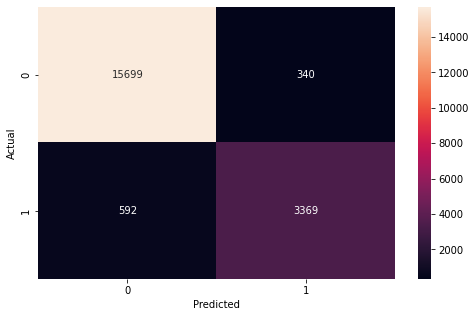

In [ ]:
y_true = ['0','1']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **Decision - 2 feature**

In [ ]:
data2

,past_events,ip_past_6hr_counts,previous_downloads,ip,app,device,os,channel,is_attributed,day,hour
0,1309.0,0.0,1.0,89489,3,1,13,379,0,6,15
1,1309.0,0.0,1.0,204158,35,1,13,21,1,6,15
2,1309.0,0.0,1.0,3437,6,1,13,459,0,6,15
3,1309.0,0.0,1.0,167543,3,1,13,379,0,6,15
4,1309.0,0.0,1.0,147509,3,1,13,379,0,6,15
...,...,...,...,...,...,...,...,...,...,...,...
2300556,2820.0,23.0,29.0,32457,2,1,19,477,0,9,15
2300557,22.0,70.0,14.0,20266,14,1,13,446,0,9,15
2300558,78.0,62.0,80.0,49383,12,2,17,178,0,9,16
2300559,1774.0,9.0,11.0,34894,12,1,15,145,0,9,16


In [ ]:
I = SVM.coef_
I

array([[-0.00956929, -0.02512614,  0.09783054,  0.69462133,  1.38477918,
        -0.01538769, -0.02180254, -0.29086378, -0.14733814, -0.12743113]])

In [ ]:
SVM.fit(x_train[:,[3,6]],y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(class_weight='balanced')

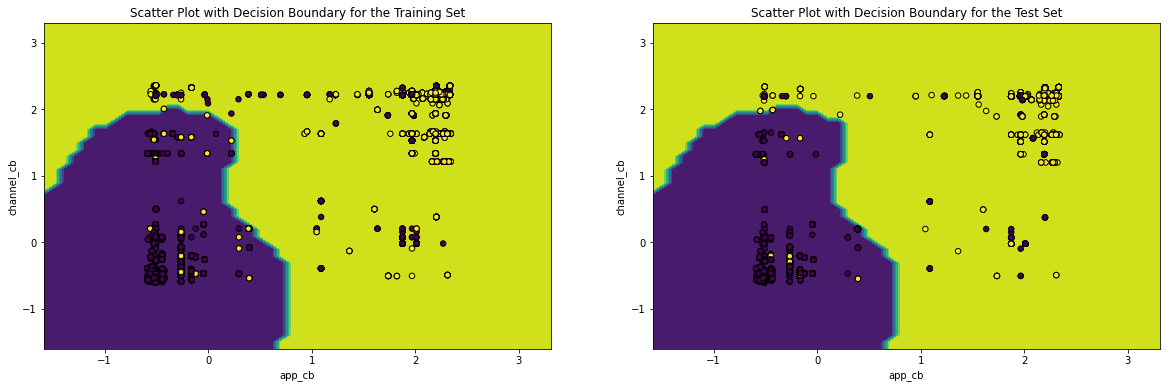

In [ ]:
x_min, x_max = x_train[:, 3].min() - 1, x_train[:, 3].max() + 1
y_min, y_max = x_train[:, 6].min() - 1, x_train[:, 6].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_train = SVM.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = x_test[:, 3].min() - 1, x_test[:, 3].max() + 1
y_min, y_max = x_test[:, 6].min() - 1, x_test[:, 6].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_test = SVM.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_train[:, 3], x_train[:, 6], c = y_train['is_attributed'], s = 30, edgecolor = 'k')
plt.xlabel('app_cb')
plt.ylabel('channel_cb')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(x_test[:, 3], x_test[:, 6], c = y_test['is_attributed'], s = 30, edgecolor = 'k')
plt.xlabel('app_cb')
plt.ylabel('channel_cb')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

## **KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy : 91.53263311908869 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     99945
           1       0.93      0.89      0.91     91425

    accuracy                           0.92    191370
   macro avg       0.92      0.91      0.91    191370
weighted avg       0.92      0.92      0.92    191370



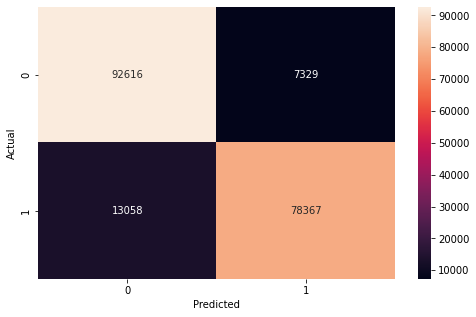

In [ ]:
y_true = ['0','1']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **Decision - 2 feature**

In [ ]:
data2

,past_events,ip_past_6hr_counts,previous_downloads,ip,app,device,os,channel,is_attributed,day,hour
0,1309.0,0.0,1.0,89489,3,1,13,379,0,6,15
1,1309.0,0.0,1.0,204158,35,1,13,21,1,6,15
2,1309.0,0.0,1.0,3437,6,1,13,459,0,6,15
3,1309.0,0.0,1.0,167543,3,1,13,379,0,6,15
4,1309.0,0.0,1.0,147509,3,1,13,379,0,6,15
...,...,...,...,...,...,...,...,...,...,...,...
2300556,2820.0,23.0,29.0,32457,2,1,19,477,0,9,15
2300557,22.0,70.0,14.0,20266,14,1,13,446,0,9,15
2300558,78.0,62.0,80.0,49383,12,2,17,178,0,9,16
2300559,1774.0,9.0,11.0,34894,12,1,15,145,0,9,16


Feature: 0, Score: 0.01480
Feature: 1, Score: 0.01560
Feature: 2, Score: 0.00400
Feature: 3, Score: 0.04260
Feature: 4, Score: 0.21200
Feature: 5, Score: 0.01580
Feature: 6, Score: 0.01880
Feature: 7, Score: 0.16660
Feature: 8, Score: 0.01860
Feature: 9, Score: 0.01340


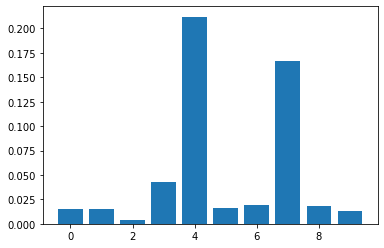

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(knn, x_test[0:1000], y_test[0:1000], scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
d = {'x_tr4': x_train[:,4], 'x_tr3': x_train[:,7], 'y': y_train['is_attributed']}
c = {'x_te4': x_test[:,4], 'x_te3': x_test[:,7], 'y': y_test['is_attributed']}
dd = pd.DataFrame(data=d)
cc = pd.DataFrame(data=c)
cc

,x_te4,x_te3,y
801905,0.321685,-0.202381,1
1303506,-0.053529,0.233047,1
2029038,-0.428742,0.755561,0
402576,0.321685,-0.202381,1
2025700,-0.053529,-0.202381,1
...,...,...,...
1641795,-0.016008,1.895591,1
1596303,-0.316178,-0.906983,0
2211263,-0.428742,1.634334,0
2050072,-0.091050,-1.041570,0


In [ ]:
sampletrain = dd.sample(1000)
sampletest = cc.sample(1000)
sampletest

,x_te4,x_te3,y
2007798,-0.316178,0.803062,0
2145896,-0.053529,-0.202381,1
1404449,-0.053529,-0.202381,1
347064,-0.053529,-0.202381,1
238635,-0.691392,-0.265716,0
...,...,...,...
2092282,-0.428742,1.800589,1
1571009,-0.428742,1.634334,0
1020337,-0.653871,0.328050,0
1009894,-0.391221,-0.994068,1


In [ ]:
knn.fit(x_train[:,[4,7]],y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

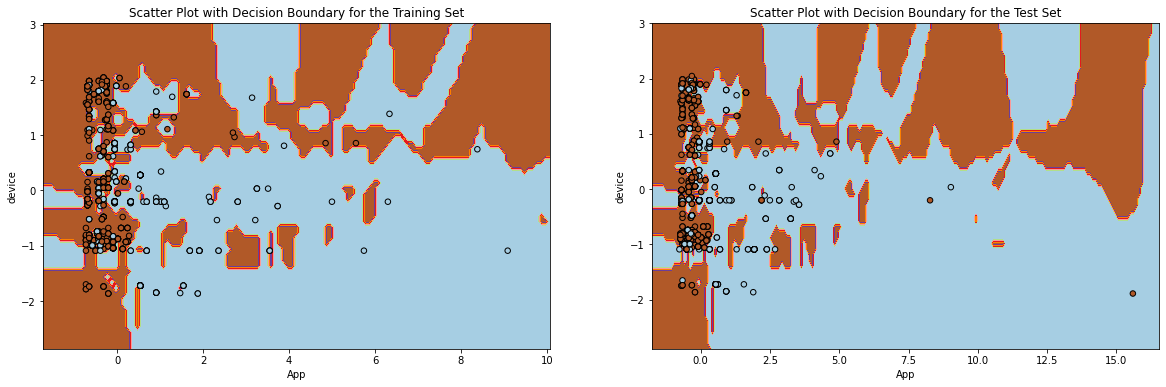

In [ ]:
x_min, x_max = sampletrain.x_tr4.values.min() - 1, sampletrain.x_tr4.values.max() + 1
y_min, y_max = sampletrain.x_tr3.values.min() - 1, sampletrain.x_tr3.values.max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_train = knn.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = sampletest.x_te4.values.min() - 1, sampletest.x_te4.values.max() + 1
y_min, y_max = sampletest.x_te3.values.min() - 1, sampletest.x_te3.values.max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_test = knn.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train , cmap='Paired_r')
plt.scatter(sampletrain.x_tr4.values, sampletrain.x_tr3.values, c = sampletrain.y.values, s = 30, edgecolor = 'k' , cmap='Paired_r')
plt.xlabel('App')
plt.ylabel('device')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test,  cmap='Paired_r')
plt.scatter(sampletest.x_te4.values, sampletest.x_te3.values, c = sampletest.y.values, s = 30, edgecolor = 'k' ,  cmap='Paired_r')
plt.xlabel('App')
plt.ylabel('device')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

### **AUC curve**

In [ ]:
predict = knn.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, predict[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

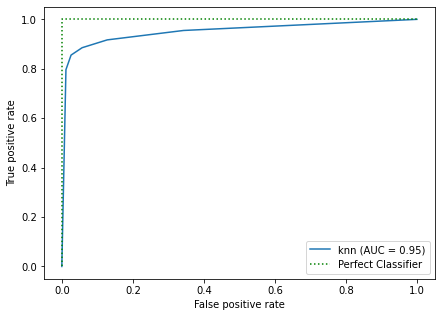

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
 
plt.plot(fpr, tpr, label='knn (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

## **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(x_train, y_train) 
y_pred = dt.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy : 90.29868749633242 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94    368531
           1       0.80      0.68      0.74     91582

    accuracy                           0.90    460113
   macro avg       0.86      0.82      0.84    460113
weighted avg       0.90      0.90      0.90    460113



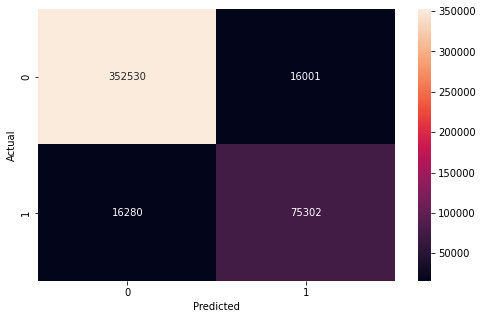

In [ ]:
y_true = ['0','1']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **Decision - 2 feature**

In [ ]:
data2

,past_events,ip_past_6hr_counts,previous_downloads,ip,app,device,os,channel,is_attributed,day,hour
0,1309.0,0.0,1.0,89489,3,1,13,379,0,6,15
1,1309.0,0.0,1.0,204158,35,1,13,21,1,6,15
2,1309.0,0.0,1.0,3437,6,1,13,459,0,6,15
3,1309.0,0.0,1.0,167543,3,1,13,379,0,6,15
4,1309.0,0.0,1.0,147509,3,1,13,379,0,6,15
...,...,...,...,...,...,...,...,...,...,...,...
2300556,2820.0,23.0,29.0,32457,2,1,19,477,0,9,15
2300557,22.0,70.0,14.0,20266,14,1,13,446,0,9,15
2300558,78.0,62.0,80.0,49383,12,2,17,178,0,9,16
2300559,1774.0,9.0,11.0,34894,12,1,15,145,0,9,16


Feature: 0, Score: 0.06825
Feature: 1, Score: 0.04418
Feature: 2, Score: 0.04380
Feature: 3, Score: 0.38666
Feature: 4, Score: 0.01441
Feature: 5, Score: 0.01747
Feature: 6, Score: 0.01754
Feature: 7, Score: 0.01926
Feature: 8, Score: 0.01983
Feature: 9, Score: 0.00250
Feature: 10, Score: 0.06098
Feature: 11, Score: 0.19665
Feature: 12, Score: 0.00955
Feature: 13, Score: 0.08370
Feature: 14, Score: 0.01522


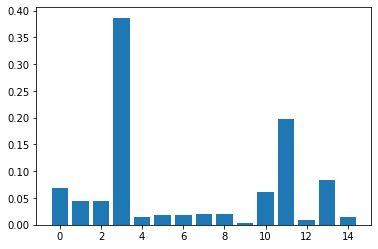

In [ ]:
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
x_tr = sc.inverse_transform(x_train)
x_te = sc.inverse_transform(x_test)

In [ ]:
dt.fit(x_tr[:,[4,7]],y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

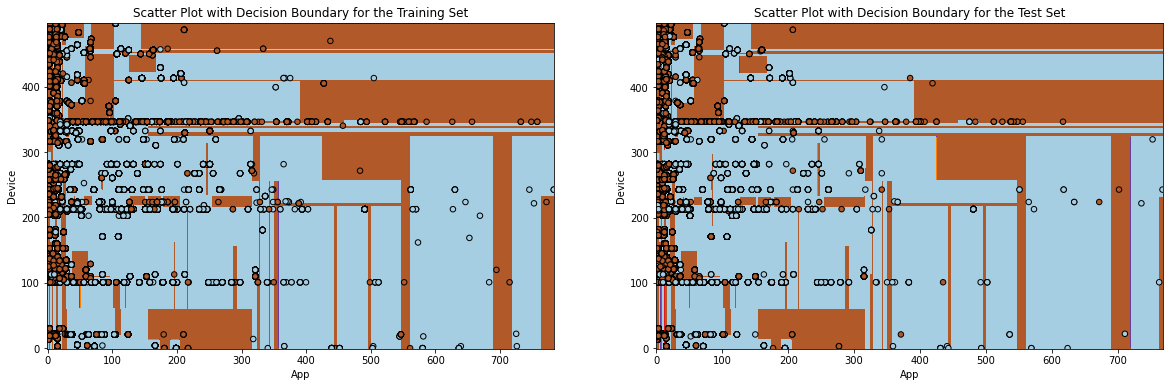

In [ ]:
x_min, x_max = x_tr[:, 4].min() - 1, x_tr[:, 4].max() + 1
y_min, y_max = x_tr[:, 7].min() - 1, x_tr[:, 7].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_train = dt.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = x_te[:, 4].min() - 1, x_te[:, 4].max() + 1
y_min, y_max = x_te[:, 7].min() - 1, x_te[:, 7].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_test = dt.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train , cmap='Paired_r')
plt.scatter(x_tr[:, 4], x_tr[:, 7], c = y_train['is_attributed'], s = 30, edgecolor = 'k' , cmap='Paired_r')
plt.xlabel('App')
plt.ylabel('Device')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test,  cmap='Paired_r')
plt.scatter(x_te[:, 4], x_te[:, 7], c = y_test['is_attributed'], s = 30, edgecolor = 'k' ,  cmap='Paired_r')
plt.xlabel('App')
plt.ylabel('Device')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

#### **Sample**

In [ ]:
d = {'x_tr4': x_tr[:,4], 'x_tr3': x_tr[:,7], 'y': y_train['is_attributed']}
c = {'x_te4': x_te[:,4], 'x_te3': x_te[:,7], 'y': y_test['is_attributed']}
dd = pd.DataFrame(data=d)
cc = pd.DataFrame(data=c)
cc

,x_te4,x_te3,y
633060,21.0,128.0,0
1297368,15.0,111.0,0
1381926,10.0,317.0,1
1767728,18.0,107.0,0
2165285,45.0,465.0,1
...,...,...,...
2119756,8.0,145.0,0
1126141,18.0,376.0,0
631386,13.0,400.0,0
1326996,18.0,439.0,0


In [ ]:
sampletrain = dd.sample(1000)
sampletest = cc.sample(1000)
sampletest

,x_te4,x_te3,y
1585962,18.0,439.0,0
1495231,21.0,128.0,0
1977283,21.0,232.0,0
1557900,9.0,134.0,0
1034697,15.0,315.0,1
...,...,...,...
539644,3.0,205.0,0
914599,5.0,113.0,1
2116100,14.0,439.0,0
443228,3.0,280.0,0


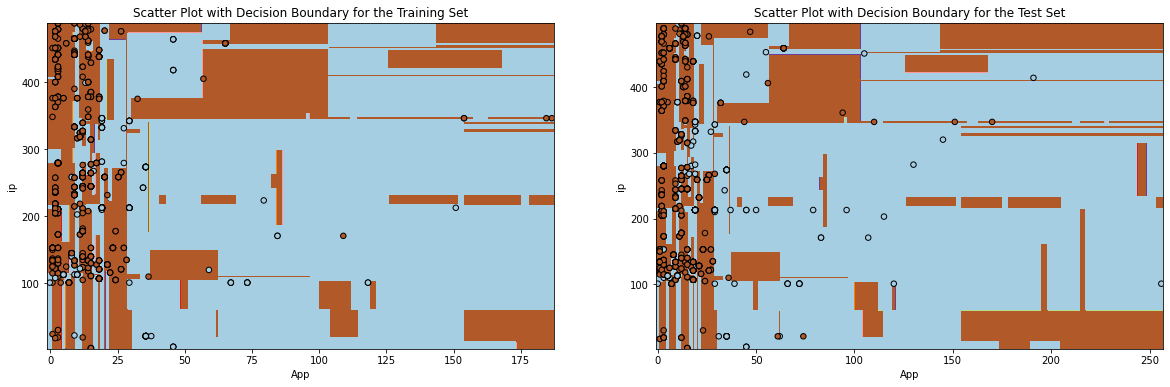

In [ ]:
x_min, x_max = sampletrain.x_tr4.values.min() - 1, sampletrain.x_tr4.values.max() + 1
y_min, y_max = sampletrain.x_tr3.values.min() - 1, sampletrain.x_tr3.values.max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_train = dt.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = sampletest.x_te4.values.min() - 1, sampletest.x_te4.values.max() + 1
y_min, y_max = sampletest.x_te3.values.min() - 1, sampletest.x_te3.values.max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_test = dt.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train , cmap='Paired_r')
plt.scatter(sampletrain.x_tr4.values, sampletrain.x_tr3.values, c = sampletrain.y.values, s = 30, edgecolor = 'k' , cmap='Paired_r')
plt.xlabel('App')
plt.ylabel('ip')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test,  cmap='Paired_r')
plt.scatter(sampletest.x_te4.values, sampletest.x_te3.values, c = sampletest.y.values, s = 30, edgecolor = 'k' ,  cmap='Paired_r')
plt.xlabel('App')
plt.ylabel('ip')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

### **AUC curve**

In [ ]:
predict = dt.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, predict[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

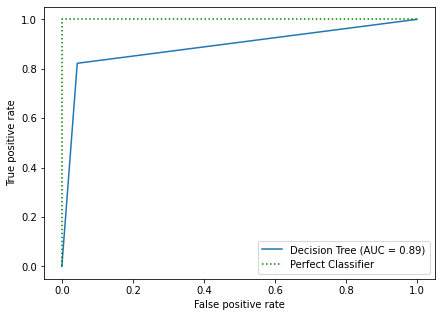

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
 
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

## **Random Forrest**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy : 92.67910330772848 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     99945
           1       0.96      0.88      0.92     91425

    accuracy                           0.93    191370
   macro avg       0.93      0.92      0.93    191370
weighted avg       0.93      0.93      0.93    191370



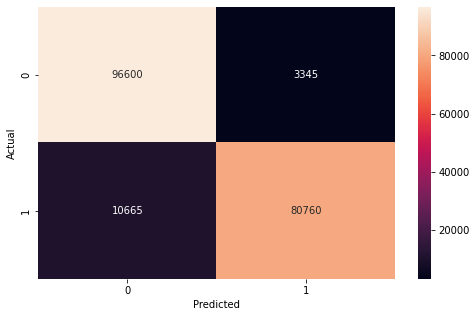

In [ ]:
y_true = ['0','1']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

In [ ]:
predict = rf.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, predict[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

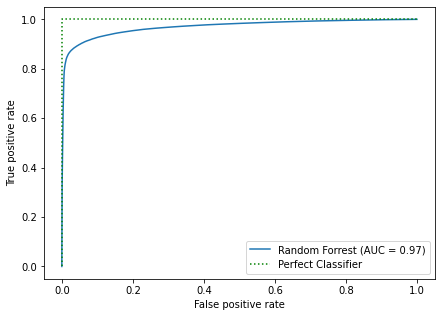

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
 
plt.plot(fpr, tpr, label='Random Forrest (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

### **Decision 2 feature**

Feature: 0, Score: 0.06544
Feature: 1, Score: 0.09818
Feature: 2, Score: 0.03227
Feature: 3, Score: 0.12226
Feature: 4, Score: 0.36649
Feature: 5, Score: 0.06086
Feature: 6, Score: 0.04700
Feature: 7, Score: 0.16519
Feature: 8, Score: 0.01042
Feature: 9, Score: 0.03189


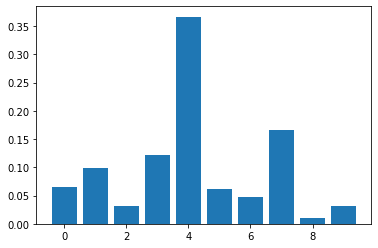

In [ ]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
x_tr = sc.inverse_transform(x_train)
x_te = sc.inverse_transform(x_test)

In [ ]:
rf.fit(x_tr[:,[4,7]],y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=42)

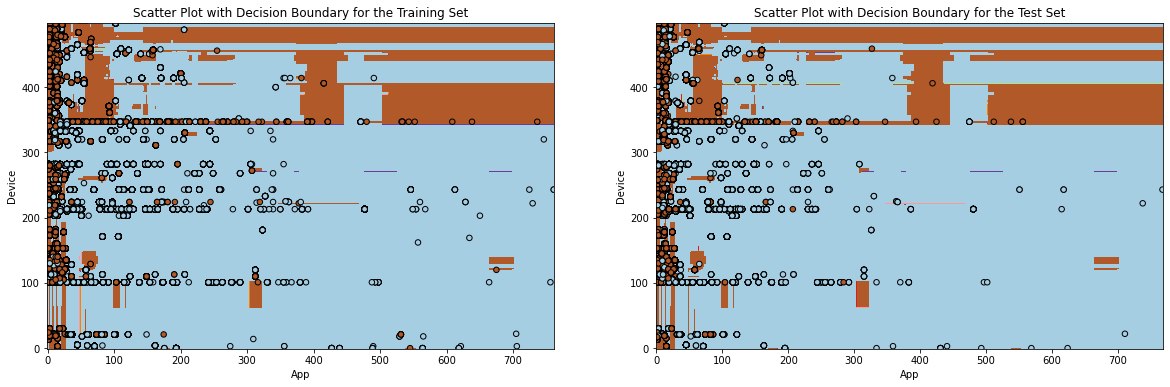

In [ ]:
x_min, x_max = x_tr[:, 4].min() - 1, x_tr[:, 4].max() + 1
y_min, y_max = x_tr[:, 7].min() - 1, x_tr[:, 7].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_train = rf.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = x_te[:, 4].min() - 1, x_te[:, 4].max() + 1
y_min, y_max = x_te[:, 7].min() - 1, x_te[:, 7].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_test = rf.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train , cmap='Paired_r')
plt.scatter(x_tr[:, 4], x_tr[:, 7], c = y_train['is_attributed'], s = 30, edgecolor = 'k' , cmap='Paired_r')
plt.xlabel('App')
plt.ylabel('Device')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test,  cmap='Paired_r')
plt.scatter(x_te[:, 4], x_te[:, 7], c = y_test['is_attributed'], s = 30, edgecolor = 'k' ,  cmap='Paired_r')
plt.xlabel('App')
plt.ylabel('Device')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

## **Naive Bayes**

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 93.65699295607818 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    368531
           1       0.84      0.84      0.84     91582

    accuracy                           0.94    460113
   macro avg       0.90      0.90      0.90    460113
weighted avg       0.94      0.94      0.94    460113



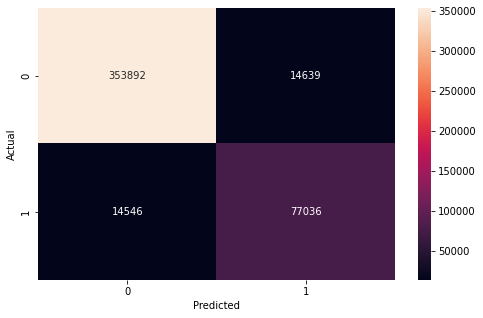

In [ ]:
y_true = ['0','1']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

### **AUC Curve**

In [ ]:
predict = nb.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, predict[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

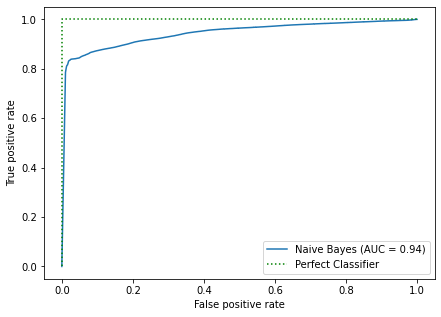

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
 
plt.plot(fpr, tpr, label='Naive Bayes (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

### **Decision 2 Feature**

In [ ]:
x_test.shape[1]

10

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(nb, x_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, [indices[f]], importances[indices[f]]))

Feature ranking:
1. [3] (0.130098)
2. [6] (0.121265)
3. [5] (0.055993)
4. [4] (0.050411)
5. [0] (0.000362)
6. [2] (0.000123)
7. [1] (0.000024)


In [ ]:
nb.fit(x_train[:,[3,6]],y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

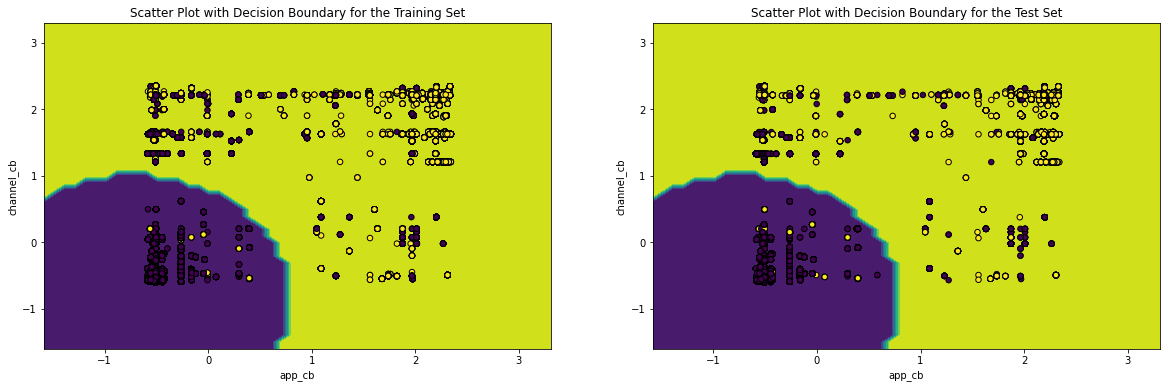

In [ ]:
x_min, x_max = x_train[:, 3].min() - 1, x_train[:, 3].max() + 1
y_min, y_max = x_train[:, 6].min() - 1, x_train[:, 6].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_train = nb.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = x_test[:, 3].min() - 1, x_test[:, 3].max() + 1
y_min, y_max = x_test[:, 6].min() - 1, x_test[:, 6].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z_test = nb.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_train[:, 3], x_train[:, 6], c = y_train['is_attributed'], s = 30, edgecolor = 'k')
plt.xlabel('app_cb')
plt.ylabel('channel_cb')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(x_test[:, 3], x_test[:, 6], c = y_test['is_attributed'], s = 30, edgecolor = 'k')
plt.xlabel('app_cb')
plt.ylabel('channel_cb')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()